In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score
)

from utils import get_data

# sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
X = pd.read_csv('data/CC GENERAL.csv')
X.drop(columns=['CUST_ID'], inplace=True)
X.ffill(inplace=True)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Split data into train and test sets.

TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, _, _ = train_test_split(X, X, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [4]:
num_cols = X.columns

# Train the KMeans

In [5]:
RANDOM_STATE = 42
N_JOBS = -1
VERBOSE = 4

scaler = StandardScaler()
# For KMeans use the default algo and max_iterations
clus = KMeans(n_jobs=N_JOBS, n_init=100)
clus_pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('model', clus)
])


In [6]:
results = {}
for n_clusters in range(2, 20):
    print(f"---------- n_clusters: {n_clusters} ----------")
    clus_pipeline.set_params(model__n_clusters=n_clusters)
    clus_pipeline.fit(X_train)
    
    clus_labels = clus_pipeline.named_steps['model'].labels_
    sil_score = silhouette_score(X_train, clus_labels)
    
    results[n_clusters] = {'inertia': clus_pipeline.named_steps['model'].inertia_,
                           'sil_score': sil_score}

---------- n_clusters: 2 ----------
---------- n_clusters: 3 ----------
---------- n_clusters: 4 ----------
---------- n_clusters: 5 ----------
---------- n_clusters: 6 ----------
---------- n_clusters: 7 ----------
---------- n_clusters: 8 ----------
---------- n_clusters: 9 ----------
---------- n_clusters: 10 ----------
---------- n_clusters: 11 ----------
---------- n_clusters: 12 ----------
---------- n_clusters: 13 ----------
---------- n_clusters: 14 ----------
---------- n_clusters: 15 ----------
---------- n_clusters: 16 ----------
---------- n_clusters: 17 ----------
---------- n_clusters: 18 ----------
---------- n_clusters: 19 ----------


In [7]:
print(results)

{2: {'inertia': 102180.25654960914, 'sil_score': 0.07377587716084288}, 3: {'inertia': 89436.63483310514, 'sil_score': 0.3446786955497862}, 4: {'inertia': 79056.34816608456, 'sil_score': 0.04427012202065086}, 5: {'inertia': 73034.08049310998, 'sil_score': 0.0004541976461604297}, 6: {'inertia': 67727.95939917059, 'sil_score': 0.004022543635079271}, 7: {'inertia': 63377.34965621723, 'sil_score': -0.06031569280162222}, 8: {'inertia': 59441.82430575491, 'sil_score': -0.06706021112251725}, 9: {'inertia': 55626.725194894265, 'sil_score': -0.05587372627407306}, 10: {'inertia': 52807.80827115325, 'sil_score': -0.04295900629826804}, 11: {'inertia': 50508.207624930044, 'sil_score': -0.054969214651333316}, 12: {'inertia': 48650.72053925316, 'sil_score': -0.050755897132075}, 13: {'inertia': 46874.517593571465, 'sil_score': -0.06348774964305312}, 14: {'inertia': 45507.990235015466, 'sil_score': -0.06033850632932221}, 15: {'inertia': 44241.345883199276, 'sil_score': -0.061349055857306226}, 16: {'iner

<Axes: title={'center': 'Elbow plot'}, xlabel='n_clusters'>

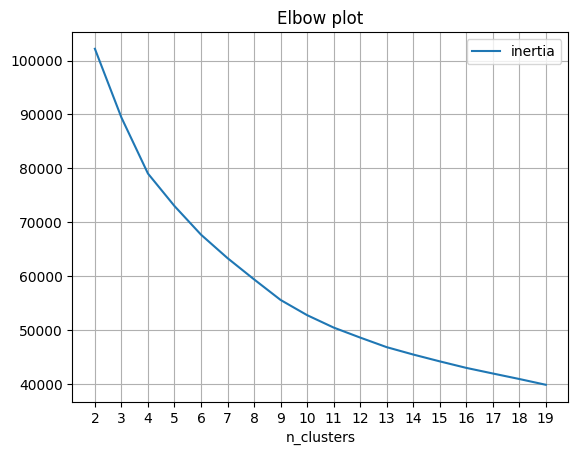

In [8]:
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
results_df.columns = ['n_clusters', 'inertia', 'sil_score']
results_df.plot(x='n_clusters', y='inertia',title='Elbow plot', xticks=results_df['n_clusters'], grid=True)

<Axes: title={'center': 'Silhoutte Score'}, xlabel='n_clusters'>

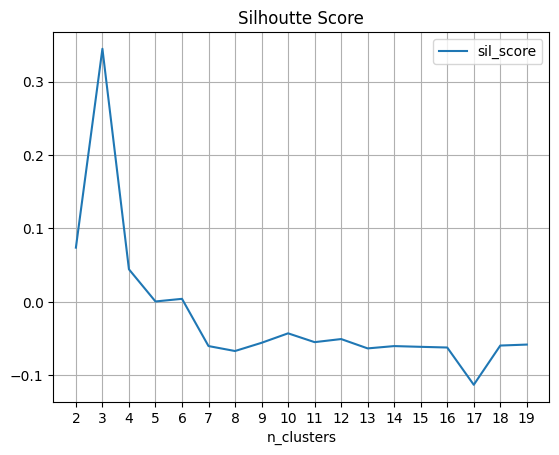

In [9]:
results_df.plot(x='n_clusters', y='sil_score',title='Silhoutte Score', xticks=results_df['n_clusters'], grid=True)